# Thermoversuch: Berechnung

In [1]:
import os
import pathlib
import sys
import warnings
warnings.filterwarnings('ignore')
__cwd__ = str(pathlib.Path(os.getcwd())).replace('\\', '/')
sys.path.append(__cwd__)
print(__cwd__)

%load_ext autoreload
%autoreload 2

D:/Python/XLH/source/xLH_base/thermoversuch/berechnungen


In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # https://matplotlib.org/stable/gallery/
plt.rcParams['font.size'] = 6
dpi = 600
%matplotlib inline

## Masse des Wassers
- messung.pkl: 820g Wasser im Wasserkocher
- messung_1.pkl: 787 g Wasser im Wasserkocher

In [4]:
# laden der Rohdaten aus dem Notebook 1
df = pd.read_pickle('daten/messung.pkl')
print(df.shape)
df.head(5)

# Zoom der Rohdaten
index_start = 10  # s
index_end = 200  # s
df = df[index_start:index_end]

(3601, 10)


In [5]:
df

,t [s],relais,U [V],I [A],Pel [W],Eel [J],T1 [°C],T2 [°C],T3 [°C],Tmw [°C]
10,10.100001,0.0,239.100006,0.000,0.000000,0.00000,23.850000,23.549999,23.750000,23.716667
11,11.120032,0.0,239.199997,0.000,0.000000,0.00000,23.850000,23.549999,23.750000,23.716667
12,12.140011,0.0,239.199997,0.000,0.000000,0.00000,23.850000,23.549999,23.750000,23.716667
13,13.160007,0.0,239.300003,0.000,0.000000,0.00000,23.850000,23.549999,23.750000,23.716667
14,14.180009,0.0,239.300003,0.000,0.000000,0.00000,23.850000,23.549999,23.650000,23.683334
...,...,...,...,...,...,...,...,...,...,...
195,196.403168,1.0,229.199997,7.914,1808.800049,311890.84375,85.849998,81.550003,82.849998,83.416664
196,197.403244,1.0,229.300003,7.914,1809.599976,313700.06250,85.849998,81.550003,82.849998,83.416664
197,198.423218,1.0,229.300003,7.914,1808.500000,315545.37500,85.849998,81.550003,82.849998,83.416664
198,199.423264,1.0,229.199997,7.914,1808.900024,317354.09375,88.250000,84.349998,85.449997,86.016663


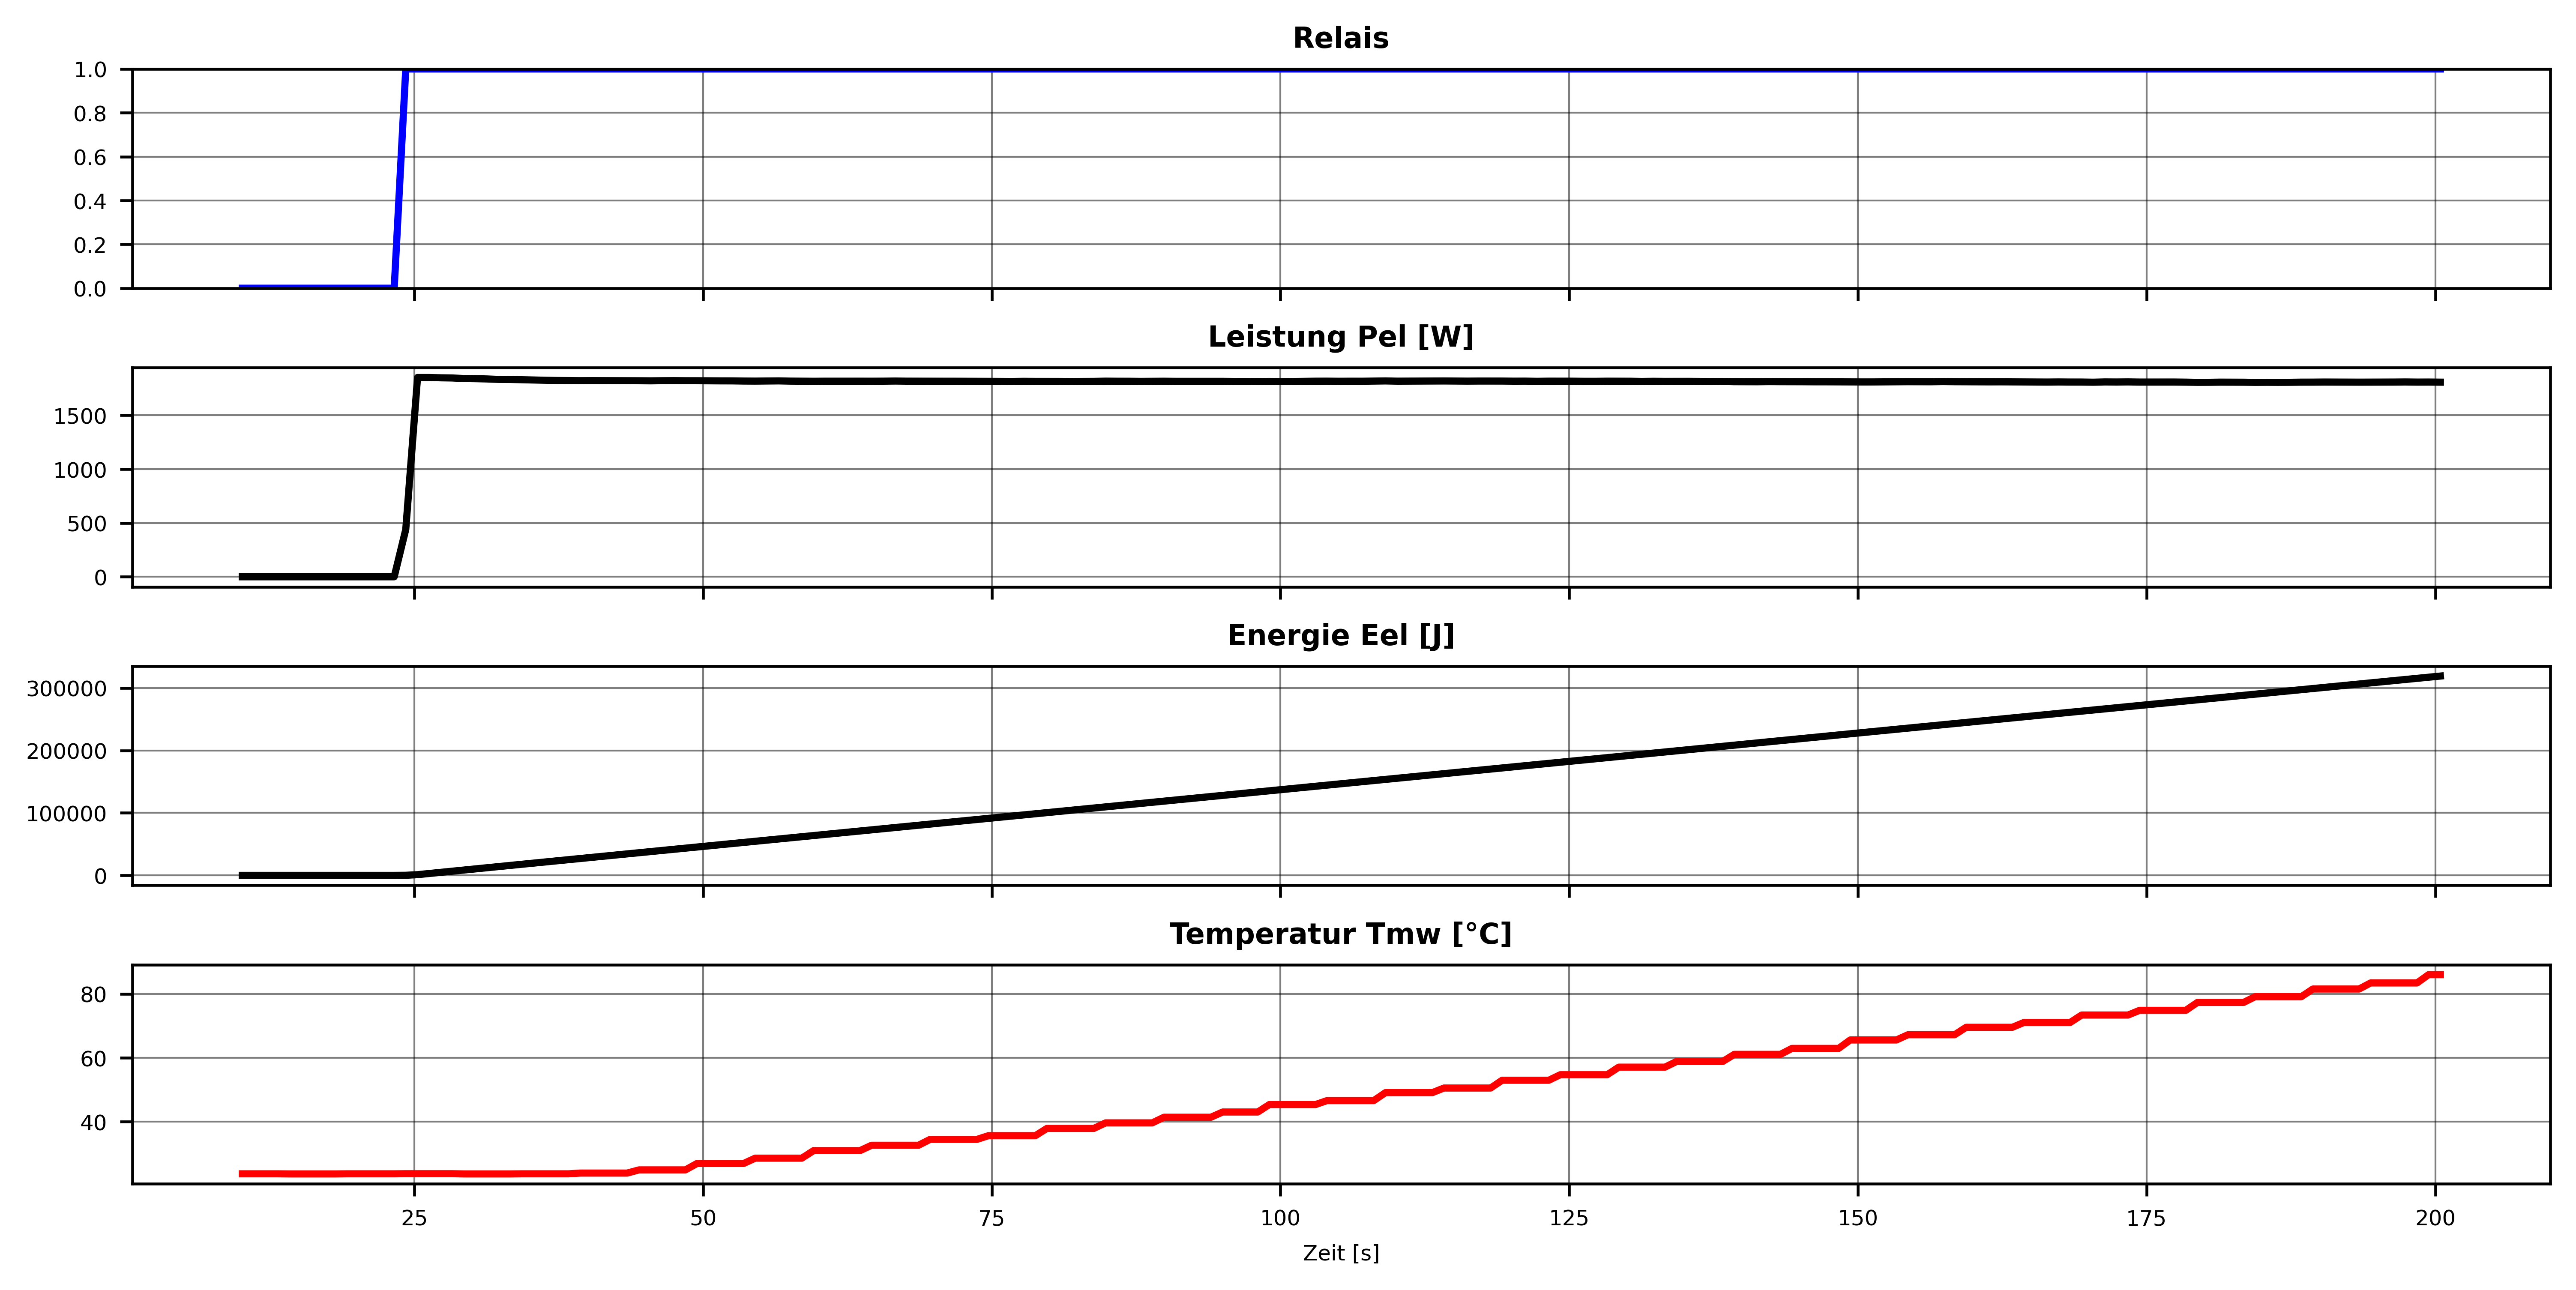

In [6]:
# Erstellung der Visualisierung mit den Rohdaten
fig, ax = plt.subplots(4, 1, figsize=(10, 5), sharex=True, dpi=dpi)
ax[0].set_title('Relais', fontsize=8, fontweight='bold')
ax[0].grid(which='both', color='black', alpha=0.5, ls='-', lw=0.5)
ax[0].set_ylim([0, 1])
ax[0].plot(df['t [s]'], df['relais'], lw=2, ls='-', marker='o', markersize=0, color='blue', alpha=1.0, label='')

ax[1].set_title('Leistung Pel [W]', fontsize=8, fontweight='bold')
ax[1].grid(which='both', color='black', alpha=0.5, ls='-', lw=0.5)
ax[1].plot(df['t [s]'], df['Pel [W]'], lw=2, ls='-', marker='o', markersize=0, color='black', alpha=1.0, label='')

ax[2].set_title('Energie Eel [J]', fontsize=8, fontweight='bold')
ax[2].grid(which='both', color='black', alpha=0.5, ls='-', lw=0.5)
ax[2].plot(df['t [s]'], df['Eel [J]'], lw=2, ls='-', marker='o', markersize=0, color='black', alpha=1.0, label='')

ax[3].set_title('Temperatur Tmw [°C]', fontsize=8, fontweight='bold')
ax[3].grid(which='both', color='black', alpha=0.5, ls='-', lw=0.5)
ax[3].plot(df['t [s]'], df['Tmw [°C]'], lw=2, ls='-', marker='o', markersize=0, color='red', alpha=1.0, label='')

ax[3].set_xlabel('Zeit [s]')
fig.tight_layout()
fig.savefig('daten/visualisierung_1.png', dpi=300)  # speicherung als PNG im Ordner daten

In [7]:
# Berechnung des Energieinhaltes im Wasser
m_h2o = 0.787  # kg
rho_h20 = 1.0  # 1 kg / dm^3
V_h2o = m_h2o * rho_h20  # dm^3
c_h2o = 4185  # J·kg / K
df['Eth [J]'] = m_h2o * c_h2o * (df['Tmw [°C]'] - df['Tmw [°C]'].iloc[0])
etha_wk = 0.80  # Wirkungsgrad Wasserkocher => empirischer Wert
df['Eel_eta [J]'] = df['Eel [J]'] * etha_wk
t_const = 22  # s Zeitkonstante des Systems
t_const_index = int(t_const)
# Verschiebung des Energieflusses um die Zeitkonstante des Systems
df['Eel_eta_t_const [J]'] = df['Eel_eta [J]'].shift(t_const_index)    

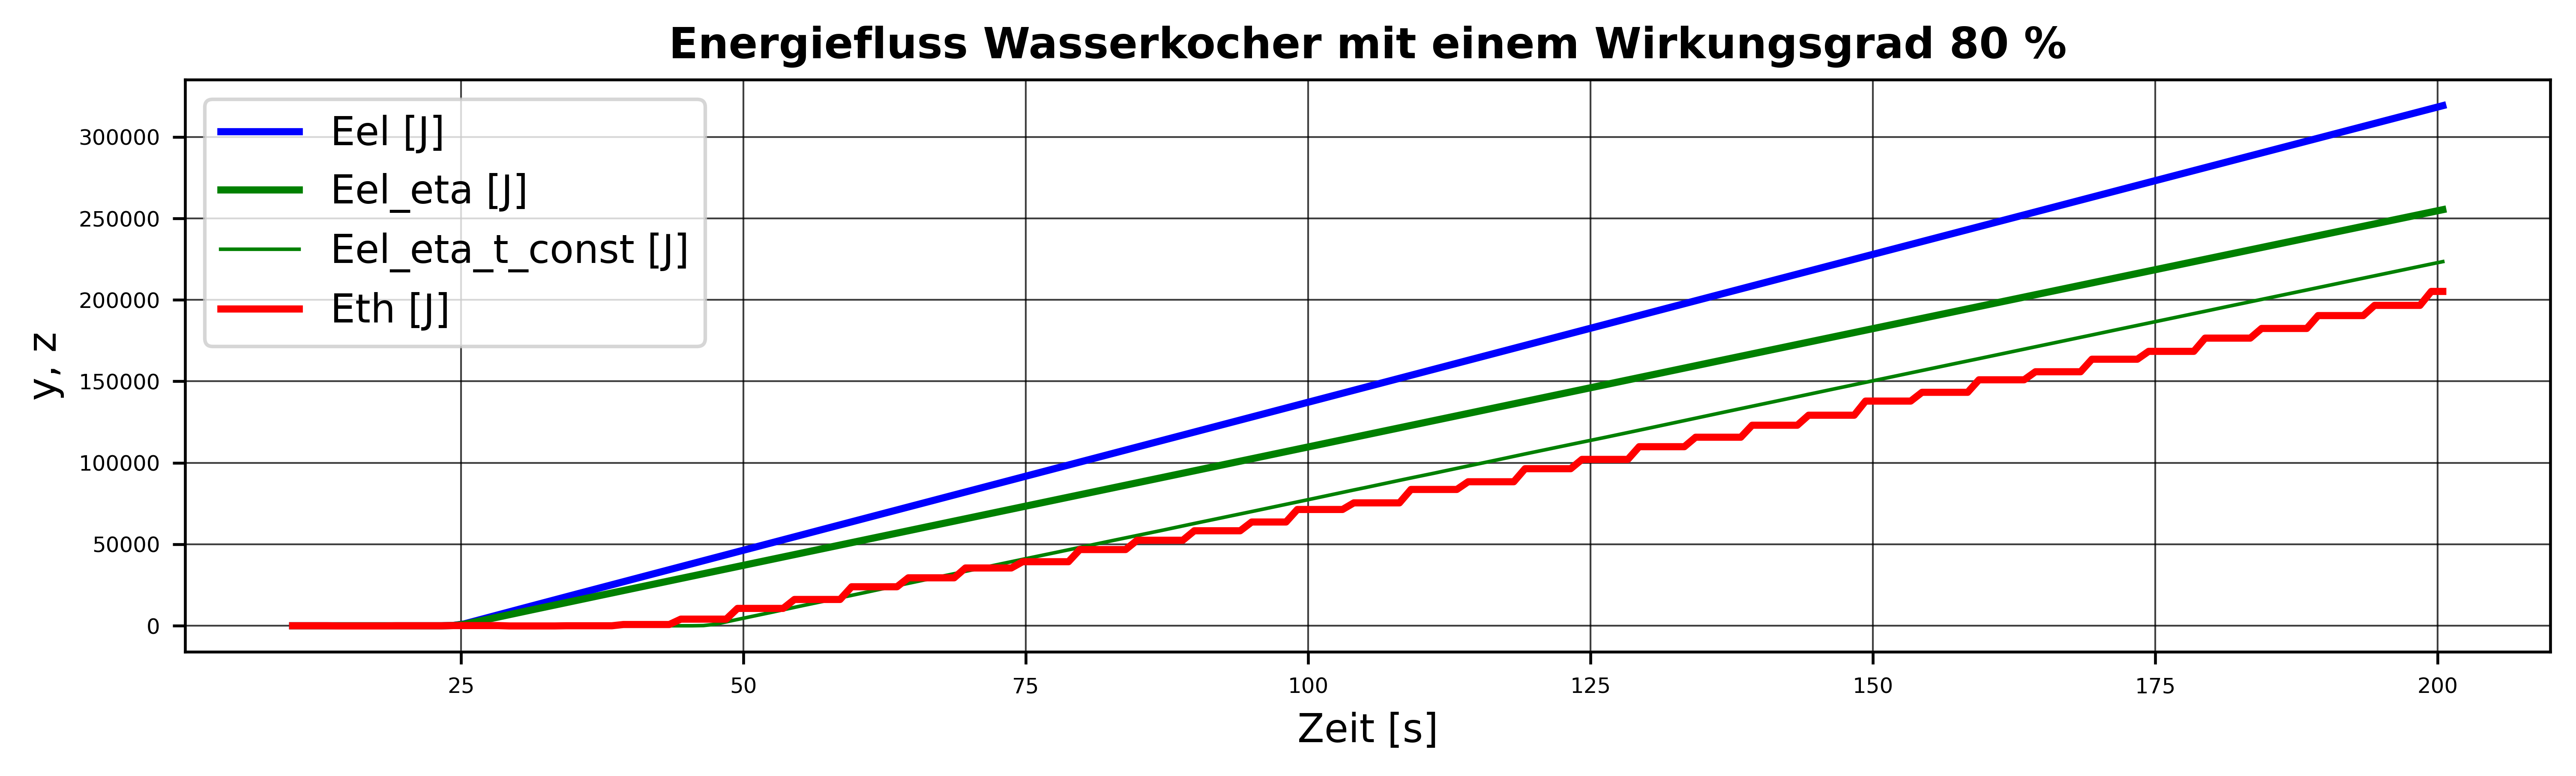

In [8]:
# Visualisierung der Berechnung
fig, ax = plt.subplots(1, 1, figsize=(10, 3), dpi=dpi)
ax.plot(df['t [s]'], df['Eel [J]'], lw=2, ls='-', marker='', markersize=0, color='blue', alpha=1.0, label='Eel [J]')
ax.plot(df['t [s]'], df['Eel_eta [J]'], lw=2, ls='-', marker='', markersize=0, color='green', alpha=1.0, label='Eel_eta [J]')
ax.plot(df['t [s]'], df['Eel_eta_t_const [J]'], lw=1, ls='-', marker='', markersize=0, color='green', alpha=1.0, label='Eel_eta_t_const [J]')
ax.plot(df['t [s]'], df['Eth [J]'], lw=2, ls='-', marker='', markersize=0, color='red', alpha=1.0, label='Eth [J]')

ax.grid(which='both', color='k', alpha=0.75, ls='-', lw=0.5)
ax.legend(loc='best', fontsize=11)  # best, upper left, upper center, upper right, center .., lower ..
ax.set_xlabel('Zeit [s]', fontsize=11)
ax.set_ylabel('y, z', fontsize=11)
ax.set_title(f'Energiefluss Wasserkocher mit einem Wirkungsgrad {etha_wk*100.0:0.0f} %', fontsize=12, fontweight='bold')
fig.tight_layout()
fig.savefig('daten/visualisierung_2.png', dpi=300)

In [ ]:
# END